# Test trained neural density estimator (NPE)

In [2]:
# Imports
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from models import WF, WF_bottleneck, WF_DFE, WF_FD
import pickle

In [34]:
%%capture
# Test function - accuracy
# Compare sample mean to true parameter
def test_estimator(posterior, X, theta,output_file_name='test_results.csv'):
    output_data = pd.DataFrame(columns = ['s','mu'], index = [i for i in range(len(theta))])
    for i in range(len(X)):
        xi = X.iloc[i,:]
        true_param = theta.iloc[i,:]
        samps = posterior.set_default_x(xi).sample((100,))
        m = np.array(samps.mean(0))
        output_data.iloc[i,:] = m-true_param
    output_data.to_csv(output_file_name)
    return output_data

with open('posterior.pkl', 'rb') as f:
    posterior = pickle.load(f)
X = pd.read_csv('test_sims/WF_sims.csv')
theta = pd.read_csv('test_sims/WF_thetas.csv')
test_results = test_estimator(posterior, X, theta)

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\nadav\AppData\Local\Temp\ipykernel_26592\3716009228.py:7: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel('$\mu$')


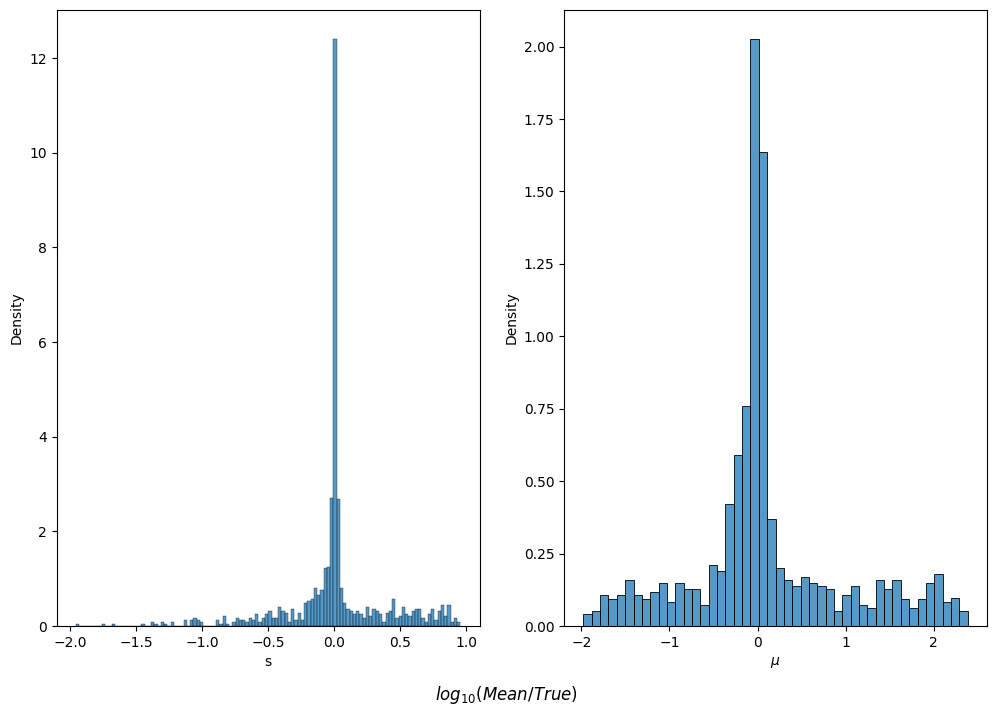

In [36]:
def plot_test_results(test_results):
    fig, ax = plt.subplots(1,2, figsize=(12,8))
    sns.histplot(test_results['s'], ax = ax[0], stat='density')
    sns.histplot(test_results['mu'], ax = ax[1], stat='density')
    fig.supxlabel('$log_{10}({Mean}/{True})$')
    ax[0].set_xlabel('s')
    ax[1].set_xlabel('$\mu$')
plot_test_results(test_results)

In [37]:
%%capture
# Test on simulations from another model - DFE

X = pd.read_csv('test_sims/WF_DFE_sims.csv').iloc[:200,:]
theta = pd.read_csv('test_sims/WF_DFE_thetas.csv').iloc[:200,:]
test_results = test_estimator(posterior, X, theta, output_file_name='test_results_DFE.csv')

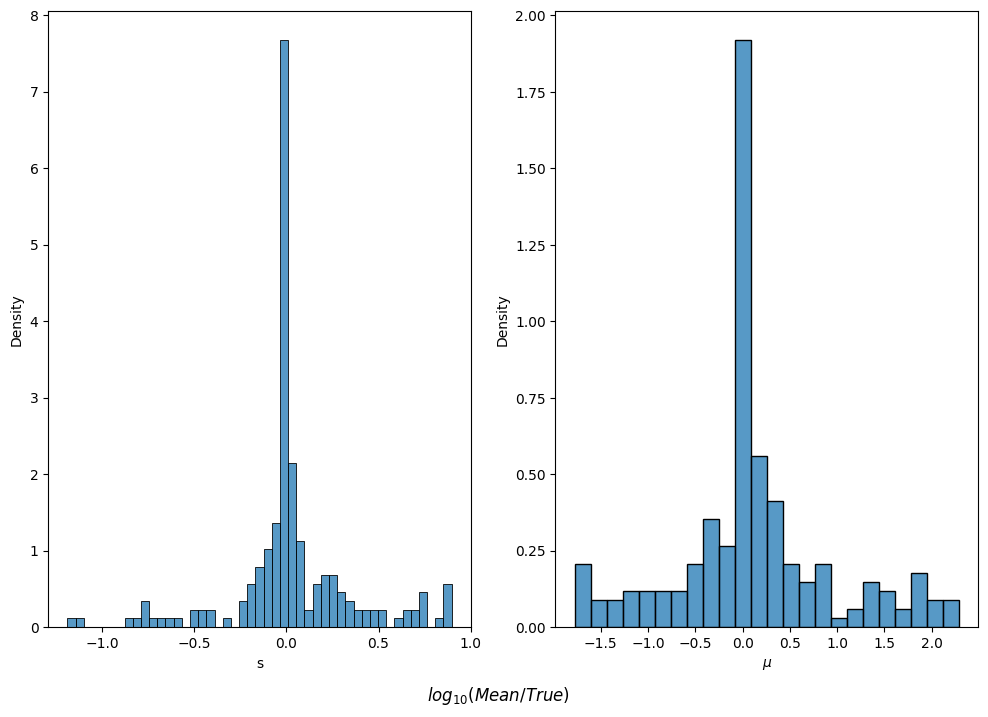

In [38]:
plot_test_results(test_results)

In [45]:
%%capture
# Test on simulations from another model - bottleneck

X = pd.read_csv('test_sims/WF_bottleneck_sims.csv')
theta = pd.read_csv('test_sims/WF_bottleneck_thetas.csv')
test_results = test_estimator(posterior, X, theta, output_file_name='test_results_bottleneck.csv')

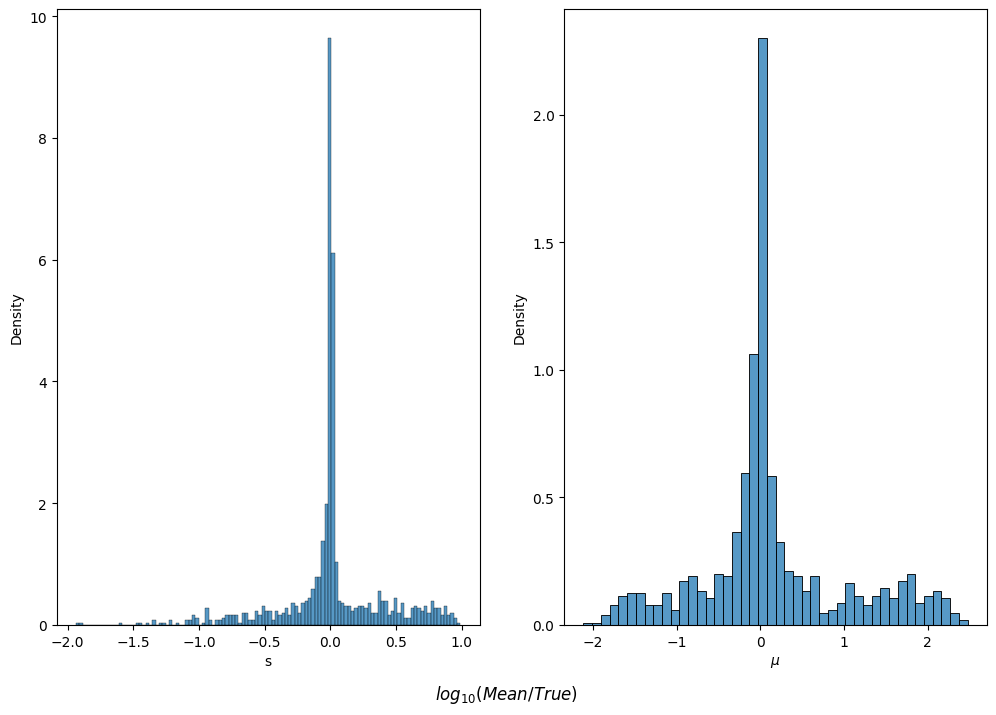

In [46]:
plot_test_results(test_results)